## Filter feature selection


## Feature Selection-Information gain - mutual information In Classification Problem Statements

## the best fretures number by  mutual information are 13: 

## CEA , CA15 , RBC , LDH , FBS , Adress , WBC , ESR , Adress , Na , ALB , PLT , ALP

## 90%
 


#### Mutual Information 

MI Estimate mutual information for a discrete target variable.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.

Inshort

A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables X and Y can be stated formally as follows:

<b>I(X ; Y) = H(X) – H(X | Y)<b>
Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.

#### Youtube Videos

Entropy: https://www.youtube.com/watch?v=1IQOtJ4NI_0
        
Information Gain: https://www.youtube.com/watch?v=FuTRucXB9rA
        
Gini Impurity: https://www.youtube.com/watch?v=5aIFgrrTqOw

Statistical test: https://www.youtube.com/watch?v=4-rxTA_5_xA

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import seaborn as sns
import warnings

In [2]:
BC=pd.read_csv('bc_with_mis_90.csv')
BC.head()

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,ALP,CA15,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS
0,1,60,Tragan,200.0,23.0,0.8,3.4,1.0,2.0,1.0,124.0,69.12,8.02,3.4,4.60,13.4,500.0,25.0,150.0,145.0,4.50,19.1,0
1,1,53,Sabha,400.0,22.0,0.7,NaN,9.6,3.0,7.0,133.0,51.82,7.91,4.4,5.00,12.5,NaN,15.0,260.0,137.8,4.18,19.1,0
2,1,50,Sabha,450.0,27.0,0.6,3.5,9.3,11.0,17.0,155.0,50.00,8.74,5.1,4.46,12.5,456.0,2.0,169.0,139.2,4.17,16.4,0
3,1,36,Obaree-center,300.0,15.0,1.1,4.2,8.5,13.0,1.0,NaN,40.11,10.34,3.1,4.33,13.8,600.0,15.0,138.0,14.0,4.00,1.1,0
4,1,30,Obaree-center,345.0,2.0,1.0,3.0,8.0,7.0,13.0,125.0,67.63,7.31,4.2,4.13,1.7,543.0,25.0,154.0,136.4,4.60,17.1,0


In [3]:
BC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2437 entries, 0 to 2436
Data columns (total 23 columns):
Sex          2437 non-null int64
Age          2437 non-null int64
Adress       2437 non-null object
FBS          2048 non-null float64
Urea         2275 non-null float64
Creatinin    2282 non-null float64
ALB          2148 non-null float64
TCa          2142 non-null float64
GPT          2140 non-null float64
GOT          2202 non-null float64
ALP          2126 non-null float64
CA15         2435 non-null float64
CEA          2435 non-null float64
WBC          2333 non-null float64
RBC          2369 non-null float64
HGB          2337 non-null float64
PLT          2258 non-null float64
ESR          2049 non-null float64
LDH          2052 non-null float64
Na           2011 non-null float64
K            2039 non-null float64
CL           1775 non-null float64
CLASS        2437 non-null int64
dtypes: float64(19), int64(3), object(1)
memory usage: 438.0+ KB


In [4]:
BC["FBS"].fillna(BC["FBS"].mean(), inplace=True)
BC["Urea"].fillna(BC["Urea"].mean(), inplace=True)
BC["Creatinin"].fillna(BC["Creatinin"].mean(), inplace=True)
BC["ALB"].fillna(BC["ALB"].mean(), inplace=True)
BC["TCa"].fillna(BC["TCa"].mean(), inplace=True)
BC["GPT"].fillna(BC["GPT"].mean(), inplace=True)
BC["GOT"].fillna(BC["GOT"].mean(), inplace=True)
BC["ALP"].fillna(BC["ALP"].mean(), inplace=True)
BC["WBC"].fillna(BC["WBC"].mean(), inplace=True)
BC["HGB"].fillna(BC["HGB"].mean(), inplace=True)
BC["RBC"].fillna(BC["RBC"].mean(), inplace=True)
BC["PLT"].fillna(BC["PLT"].mean(), inplace=True)
BC["ESR"].fillna(BC["ESR"].mean(), inplace=True)
BC["LDH"].fillna(BC["LDH"].mean(), inplace=True)
BC["Na"].fillna(BC["Na"].mean(), inplace=True)
BC["K"].fillna(BC["K"].mean(), inplace=True)
BC["CL"].fillna(BC["CL"].mean(), inplace=True)
BC["CA15"].fillna(BC["CA15"].mean(), inplace=True)
BC["CEA"].fillna(BC["CEA"].mean(), inplace=True)


## outlires by Z-score


In [5]:
BC["ZScore_FBS"] = (BC.FBS - BC.FBS.mean())/(BC.FBS.std())
BC["ZScore_Urea"] = (BC.Urea - BC.Urea.mean())/(BC.Urea.std())
BC["ZScore_creatinine"] = (BC.Creatinin - BC.Creatinin.mean())/(BC.Creatinin.std())
BC["ZScore_ALB"] = (BC.ALB - BC.ALB.mean())/(BC.ALB.std())
BC["ZScore_TCa"] = (BC.TCa - BC.TCa.mean())/(BC.TCa.std())
BC["ZScore_GPT"] = (BC.GPT - BC.GPT.mean())/(BC.GPT.std())
BC["ZScore_GOT"] = (BC.GOT - BC.GOT.mean())/(BC.GOT.std())
BC["ZScore_ALP"] = (BC.ALP - BC.ALP.mean())/(BC.ALP.std())
BC["ZScore_CA15"] = (BC.CA15 - BC.CA15.mean())/(BC.CA15.std())
BC["ZScore_CEA"] = (BC.CEA - BC.CEA.mean())/(BC.CEA.std())
BC["ZScore_WBC"] = (BC.WBC - BC.WBC.mean())/(BC.WBC.std())
BC["ZScore_RBC"] = (BC.RBC - BC.RBC.mean())/(BC.RBC.std())
BC["ZScore_HGB"] = (BC.HGB - BC.HGB.mean())/(BC.HGB.std())
BC["ZScore_PLT"] = (BC.PLT - BC.PLT.mean())/(BC.PLT.std())
BC["ZScore_ESR"] = (BC.ESR - BC.ESR.mean())/(BC.ESR.std())
BC["ZScore_LDH"] = (BC.LDH - BC.LDH.mean())/(BC.LDH.std())
BC["ZScore_Na"] = (BC.Na - BC.Na.mean())/(BC.Na.std())
BC["ZScore_CL"] = (BC.CL - BC.CL.mean())/(BC.CL.std())
BC["ZScore_K"] = (BC.K - BC.K.mean())/(BC.K.std())



In [6]:
BC_FBS_outlier_Z = BC[(BC.ZScore_FBS>3) | (BC.ZScore_FBS<-3)]
BC_Urea_outlier_Z = BC[(BC.ZScore_Urea>3) | (BC.ZScore_Urea<-3)]
BC_creatinine_outlier_Z = BC[(BC.ZScore_creatinine>3) | (BC.ZScore_creatinine<-3)]
BC_ALB_outlier_Z = BC[(BC.ZScore_ALB>3) | (BC.ZScore_ALB<-3)]
BC_TCa_outlier_Z = BC[(BC.ZScore_TCa>3) | (BC.ZScore_TCa<-3)]
BC_GPT_outlier_Z = BC[(BC.ZScore_GPT>3) | (BC.ZScore_GPT<-3)]
BC_GOT_outlier_Z = BC[(BC.ZScore_GOT>3) | (BC.ZScore_GOT<-3)]
BC_ALP_outlier_Z = BC[(BC.ZScore_ALP>3) | (BC.ZScore_ALP<-3)]
BC_CA15_outlier_Z = BC[(BC.ZScore_CA15>3) | (BC.ZScore_CA15<-3)]
BC_CEA_outlier_Z = BC[(BC.ZScore_CEA>3) | (BC.ZScore_CEA<-3)]
BC_WBC_outlier_Z = BC[(BC.ZScore_WBC>3) | (BC.ZScore_WBC<-3)]
BC_RBC_outlier_Z = BC[(BC.ZScore_RBC>3) | (BC.ZScore_RBC<-3)]
BC_HGB_outlier_Z = BC[(BC.ZScore_HGB>3) | (BC.ZScore_HGB<-3)]
BC_PLT_outlier_Z = BC[(BC.ZScore_PLT>3) | (BC.ZScore_PLT<-3)]
BC_ESR_outlier_Z = BC[(BC.ZScore_ESR>3) | (BC.ZScore_ESR<-3)]
BC_LDH_outlier_Z = BC[(BC.ZScore_LDH>3) | (BC.ZScore_LDH<-3)]
BC_Na_outlier_Z = BC[(BC.ZScore_Na>3) | (BC.ZScore_Na<-3)]
BC_K_outlier_Z = BC[(BC.ZScore_CL>3) | (BC.ZScore_CL<-3)]
BC_CL_outlier_Z = BC[(BC.ZScore_K>3) | (BC.ZScore_K<-3)]


In [7]:
BC.isnull().sum()

Sex                  0
Age                  0
Adress               0
FBS                  0
Urea                 0
Creatinin            0
ALB                  0
TCa                  0
GPT                  0
GOT                  0
ALP                  0
CA15                 0
CEA                  0
WBC                  0
RBC                  0
HGB                  0
PLT                  0
ESR                  0
LDH                  0
Na                   0
K                    0
CL                   0
CLASS                0
ZScore_FBS           0
ZScore_Urea          0
ZScore_creatinine    0
ZScore_ALB           0
ZScore_TCa           0
ZScore_GPT           0
ZScore_GOT           0
ZScore_ALP           0
ZScore_CA15          0
ZScore_CEA           0
ZScore_WBC           0
ZScore_RBC           0
ZScore_HGB           0
ZScore_PLT           0
ZScore_ESR           0
ZScore_LDH           0
ZScore_Na            0
ZScore_CL            0
ZScore_K             0
dtype: int64

In [8]:
#assigning nan to the outliers

BC['FBS'].values[BC['ZScore_FBS'] > 3] = np.nan
BC['FBS'].values[BC['ZScore_FBS'] < -3] = np.nan

BC['Urea'].values[BC['ZScore_Urea'] > 3] = np.nan
BC['Urea'].values[BC['ZScore_Urea'] < -3] = np.nan

BC['Creatinin'].values[BC['ZScore_creatinine'] > 3] = np.nan
BC['Creatinin'].values[BC['ZScore_creatinine'] < -3] = np.nan

BC['ALB'].values[BC['ZScore_ALB'] > 3] = np.nan
BC['ALB'].values[BC['ZScore_ALB'] < -3] = np.nan

BC['TCa'].values[BC['ZScore_TCa'] > 3] = np.nan
BC['TCa'].values[BC['ZScore_TCa'] < -3] = np.nan

BC['GPT'].values[BC['ZScore_GPT'] > 3] = np.nan
BC['GPT'].values[BC['ZScore_GPT'] < -3] = np.nan

BC['GOT'].values[BC['ZScore_GOT'] > 3] = np.nan
BC['GOT'].values[BC['ZScore_GOT'] < -3] = np.nan

BC['ALP'].values[BC['ZScore_ALP'] > 3] = np.nan
BC['ALP'].values[BC['ZScore_ALP'] < -3] = np.nan

BC['CA15'].values[BC['ZScore_CA15'] > 3] = np.nan
BC['CA15'].values[BC['ZScore_CA15'] < -3] = np.nan

BC['CEA'].values[BC['ZScore_CEA'] > 3] = np.nan
BC['CEA'].values[BC['ZScore_CEA'] < -3] = np.nan

BC['WBC'].values[BC['ZScore_WBC'] > 3] = np.nan
BC['WBC'].values[BC['ZScore_WBC'] < -3] = np.nan

BC['RBC'].values[BC['ZScore_RBC'] > 3] = np.nan
BC['RBC'].values[BC['ZScore_RBC'] < -3] = np.nan

BC['HGB'].values[BC['ZScore_HGB'] > 3] = np.nan
BC['HGB'].values[BC['ZScore_HGB'] < -3] = np.nan

BC['PLT'].values[BC['ZScore_PLT'] > 3] = np.nan
BC['PLT'].values[BC['ZScore_PLT'] < -3] = np.nan

BC['ESR'].values[BC['ZScore_ESR'] > 3] = np.nan
BC['ESR'].values[BC['ZScore_ESR'] < -3] = np.nan

BC['LDH'].values[BC['ZScore_LDH'] > 3] = np.nan
BC['LDH'].values[BC['ZScore_LDH'] < -3] = np.nan

BC['Na'].values[BC['ZScore_Na'] > 3] = np.nan
BC['Na'].values[BC['ZScore_Na'] < -3] = np.nan

BC['CL'].values[BC['ZScore_CL'] > 3] = np.nan
BC['CL'].values[BC['ZScore_CL'] < -3] = np.nan

BC['K'].values[BC['ZScore_K'] > 3] = np.nan
BC['K'].values[BC['ZScore_K'] < -3] = np.nan


In [9]:
BC.drop(["ZScore_FBS","ZScore_Urea","ZScore_creatinine","ZScore_ALB","ZScore_TCa","ZScore_GPT","ZScore_GOT","ZScore_ALP",
        "ZScore_CA15","ZScore_CEA","ZScore_WBC","ZScore_RBC","ZScore_HGB","ZScore_PLT","ZScore_ESR","ZScore_LDH",
        "ZScore_Na","ZScore_CL","ZScore_K"],axis=1,inplace=True)

BC.isnull().sum()


Sex           0
Age           0
Adress        0
FBS          50
Urea         66
Creatinin    27
ALB          60
TCa           8
GPT          61
GOT          43
ALP          28
CA15          3
CEA           1
WBC          13
RBC           4
HGB           3
PLT           3
ESR          30
LDH          12
Na            1
K             8
CL            3
CLASS         0
dtype: int64

In [10]:
#imputing nan values

BC["FBS"].fillna(BC["FBS"].mean(), inplace=True)
BC["Urea"].fillna(BC["Urea"].mean(), inplace=True)
BC["Creatinin"].fillna(BC["Creatinin"].mean(), inplace=True)
BC["ALB"].fillna(BC["ALB"].mean(), inplace=True)
BC["TCa"].fillna(BC["TCa"].mean(), inplace=True)
BC["GPT"].fillna(BC["GPT"].mean(), inplace=True)
BC["GOT"].fillna(BC["GOT"].mean(), inplace=True)
BC["ALP"].fillna(BC["ALP"].mean(), inplace=True)
BC["WBC"].fillna(BC["WBC"].mean(), inplace=True)
BC["HGB"].fillna(BC["HGB"].mean(), inplace=True)
BC["RBC"].fillna(BC["RBC"].mean(), inplace=True)
BC["PLT"].fillna(BC["PLT"].mean(), inplace=True)
BC["ESR"].fillna(BC["ESR"].mean(), inplace=True)
BC["LDH"].fillna(BC["LDH"].mean(), inplace=True)
BC["Na"].fillna(BC["Na"].mean(), inplace=True)
BC["K"].fillna(BC["K"].mean(), inplace=True)
BC["CL"].fillna(BC["CL"].mean(), inplace=True)
BC["CA15"].fillna(BC["CA15"].mean(), inplace=True)
BC["CEA"].fillna(BC["CEA"].mean(), inplace=True)
BC

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,ALP,CA15,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS
0,1,60,Tragan,200.00000,23.0,0.8,3.400000,1.0,2.000000,1.0,124.000000,69.120000,8.020000,3.4,4.60,13.4,500.000000,25.0,150.0,145.0,4.50,19.1,0
1,1,53,Sabha,154.36173,22.0,0.7,4.461508,9.6,3.000000,7.0,133.000000,51.820000,7.910000,4.4,5.00,12.5,283.554362,15.0,260.0,137.8,4.18,19.1,0
2,1,50,Sabha,154.36173,27.0,0.6,3.500000,9.3,11.000000,17.0,155.000000,50.000000,8.740000,5.1,4.46,12.5,456.000000,2.0,169.0,139.2,4.17,16.4,0
3,1,36,Obaree-center,300.00000,15.0,1.1,4.200000,8.5,13.000000,1.0,140.701195,40.110000,10.340000,3.1,4.33,13.8,600.000000,15.0,138.0,14.0,4.00,1.1,0
4,1,30,Obaree-center,345.00000,2.0,1.0,3.000000,8.0,7.000000,13.0,125.000000,67.630000,7.310000,4.2,4.13,1.7,543.000000,25.0,154.0,136.4,4.60,17.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,1,30,Algatroon,70.00000,28.0,0.7,5.900000,9.5,13.882247,23.0,234.000000,21.000000,1.120000,3.9,5.23,11.3,288.000000,15.0,254.0,138.7,4.35,103.6,1
2433,1,47,Sabha,98.00000,32.0,0.8,10.200000,8.8,13.882247,23.0,190.000000,21.370000,2.020000,4.8,4.57,13.2,249.000000,12.0,254.0,142.3,4.40,102.7,1
2434,1,43,Sabha,76.00000,15.0,0.6,11.400000,8.1,22.000000,15.0,143.000000,8.500000,0.500000,4.4,4.32,11.1,249.000000,8.0,254.0,137.8,4.25,110.2,1
2435,1,60,Sabha,120.00000,29.0,0.9,10.900000,8.2,51.000000,17.0,104.000000,30.967314,4.536407,4.5,4.41,12.9,293.000000,13.0,254.0,147.5,3.15,107.5,1


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = BC.columns.tolist()
for column in cols:
    if BC[column].dtype == 'object':
        BC[column] = le.fit_transform(BC[column])


In [12]:
### Train test split to avoid overfitting

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(BC.drop(labels=['CLASS'], axis=1),
    BC['CLASS'],
    test_size=0.3,
    random_state=0)

In [13]:
X_train.head()

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,ALP,CA15,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL
1816,1,50,5,236.0,83.00000,1.8,4.223726,8.1,4.00000,39.0,136.552018,50.00,9.11,11.2,15.30,11.002811,283.554362,25.392484,32.0,134.700000,3.34,18.3
260,1,50,4,83.0,14.00000,0.7,3.400000,8.4,15.59057,2.0,13.000000,39.76,7.95,4.4,3.38,14.900000,283.554362,10.000000,155.0,143.700000,4.23,16.4
1110,1,42,3,102.0,24.62444,0.9,3.900000,8.3,25.00000,23.0,156.000000,17.60,0.53,6.7,3.54,1.700000,217.000000,16.000000,185.0,137.200000,3.80,112.5
2147,1,43,19,180.0,26.00000,0.5,4.500000,9.2,14.00000,15.0,92.000000,15.28,3.35,5.7,3.56,1.000000,298.000000,15.000000,138.0,146.000000,3.90,17.0
1829,1,58,19,178.0,81.00000,3.9,8.200000,1.2,15.00000,2.0,140.701195,53.02,7.21,11.9,13.70,12.700000,33.000000,4.000000,185.0,130.009717,4.30,114.2


In [14]:
from sklearn.feature_selection import mutual_info_classif

# determine the mutual information

mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.00815611, 0.00664291, 0.04184095, 0.10525158, 0.00572758,
       0.0123485 , 0.05253719, 0.        , 0.0016802 , 0.        ,
       0.02119175, 0.13454937, 0.14613987, 0.05970275, 0.10803704,
       0.00682192, 0.02439039, 0.04632182, 0.0951896 , 0.03547215,
       0.02257094, 0.00886432])

In [17]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

CEA          0.146140
CA15         0.134549
RBC          0.108037
FBS          0.105252
LDH          0.095190
WBC          0.059703
ALB          0.052537
ESR          0.046322
Adress       0.041841
Na           0.035472
PLT          0.024390
K            0.022571
ALP          0.021192
Creatinin    0.012349
CL           0.008864
Sex          0.008156
HGB          0.006822
Age          0.006643
Urea         0.005728
GPT          0.001680
TCa          0.000000
GOT          0.000000
dtype: float64

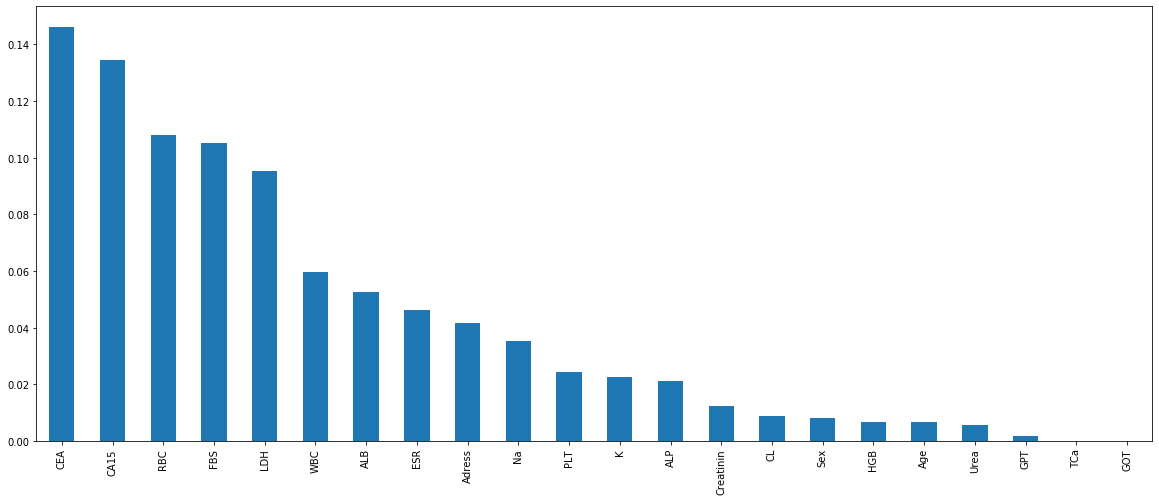

In [18]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

## تدريب النموذج علي أفضل 2 سمة بعد معالجة القيم المفقودة


In [19]:

X=BC.drop(["CLASS","Sex","Age","FBS","Adress","Urea","Creatinin","ALB","TCa","GPT","GOT","ALP","WBC","RBC","PLT","ESR","LDH","K","Na","CL","HGB"],axis=1)
Y=BC["CLASS"] 


In [20]:
X.shape


(2437, 2)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [22]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)

from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)


0.6098360655737705

In [23]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)



mean_absolute_error is = 0.3920765027322405
mean_squared_error is = 0.611628361987583


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 0.9102353585112206
Decision Tree classifier Testing Accurcy =  0.6098360655737705
[[185 133]
 [105 187]]


Text(33.0, 0.5, 'Acutl')

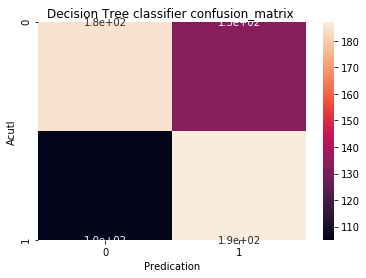

In [24]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [25]:


### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 




classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.62      0.64      0.63       318
           1       0.59      0.56      0.58       292

    accuracy                           0.60       610
   macro avg       0.60      0.60      0.60       610
weighted avg       0.60      0.60      0.60       610

accuracy_score= 0.6049180327868853


#### Difference Between Information Gain And Mutual Information
I(X ; Y) = H(X) – H(X | Y)
and
IG(S, a) = H(S) – H(S | a)

As such, mutual information is sometimes used as a synonym for 
information gain. Technically, they calculate the same quantity
if applied to the same data.

## تدريب النموذج علي أفضل 3 سمة بعد معالجة القيم المفقودة


In [26]:

X=BC.drop(["CLASS","Sex","Age","FBS","Adress","Urea","Creatinin","ALB","TCa","GPT","GOT","ALP","WBC","PLT","ESR","LDH","K","Na","CL","HGB"],axis=1)
Y=BC["CLASS"] 


In [27]:
X.shape


(2437, 3)

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [29]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)

from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)


0.7278688524590164

In [30]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)



mean_absolute_error is = 0.2721311475409836
mean_squared_error is = 0.5216619092295158


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 0.9994526546250684
Decision Tree classifier Testing Accurcy =  0.7278688524590164
[[252  94]
 [ 72 192]]


Text(33.0, 0.5, 'Acutl')

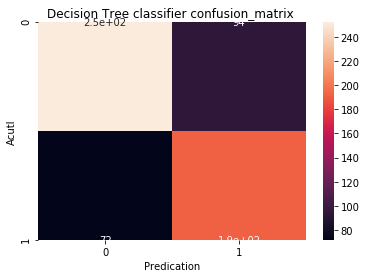

In [31]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [32]:


### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 




classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.78      0.73      0.75       346
           1       0.67      0.73      0.70       264

    accuracy                           0.73       610
   macro avg       0.72      0.73      0.73       610
weighted avg       0.73      0.73      0.73       610

accuracy_score= 0.7278688524590164


## تدريب النموذج علي أفضل 4 سمة بعد معالجة القيم المفقودة


In [33]:

X=BC.drop(["CLASS","Sex","Age","Adress","Urea","Creatinin","ALB","TCa","GPT","GOT","ALP","WBC","PLT","ESR","LDH","K","Na","CL","HGB"],axis=1)
Y=BC["CLASS"] 


In [34]:
X.shape


(2437, 4)

In [35]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [36]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)

from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)


0.8131147540983606

In [37]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)



mean_absolute_error is = 0.18688524590163935
mean_squared_error is = 0.43230226219815154


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8131147540983606
[[297  59]
 [ 55 199]]


Text(33.0, 0.5, 'Acutl')

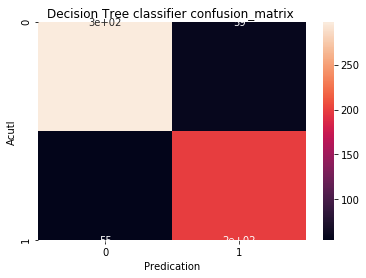

In [38]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [39]:


### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 




classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       356
           1       0.77      0.78      0.78       254

    accuracy                           0.81       610
   macro avg       0.81      0.81      0.81       610
weighted avg       0.81      0.81      0.81       610

accuracy_score= 0.8131147540983606


## تدريب النموذج علي أفضل 5 سمة بعد معالجة القيم المفقودة


In [40]:

X=BC.drop(["CLASS","Sex","Age","Adress","Urea","Creatinin","ALB","TCa","GPT","GOT","ALP","WBC","PLT","ESR","K","Na","CL","HGB"],axis=1)
Y=BC["CLASS"] 


In [41]:
X.shape


(2437, 5)

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [43]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)

from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)


0.8016393442622951

In [44]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)



mean_absolute_error is = 0.19836065573770492
mean_squared_error is = 0.44537698159840383


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8016393442622951
[[279  66]
 [ 55 210]]


Text(33.0, 0.5, 'Acutl')

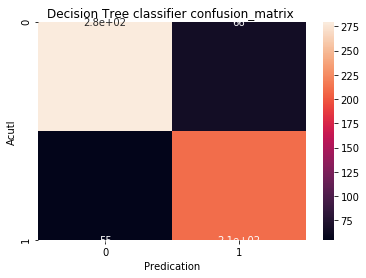

In [45]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [46]:


### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 




classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       345
           1       0.76      0.79      0.78       265

    accuracy                           0.80       610
   macro avg       0.80      0.80      0.80       610
weighted avg       0.80      0.80      0.80       610

accuracy_score= 0.8016393442622951


## تدريب النموذج علي أفضل6  سمة بعد معالجة القيم المفقودة


In [49]:

X=BC.drop(["CLASS","Sex","Age","Adress","Urea","Creatinin","ALB","TCa","GPT","GOT","ALP","PLT","ESR","K","Na","CL","HGB"],axis=1)
Y=BC["CLASS"] 


In [50]:
X.shape


(2437, 6)

In [51]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [52]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)

from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)


0.8311475409836065

In [53]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)



mean_absolute_error is = 0.16885245901639345
mean_squared_error is = 0.41091660834820665


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8311475409836065
[[268  56]
 [ 47 239]]


Text(33.0, 0.5, 'Acutl')

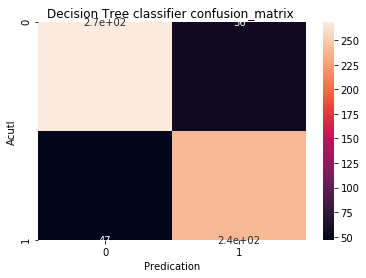

In [54]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [55]:


### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 




classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       324
           1       0.81      0.84      0.82       286

    accuracy                           0.83       610
   macro avg       0.83      0.83      0.83       610
weighted avg       0.83      0.83      0.83       610

accuracy_score= 0.8311475409836065


## تدريب النموذج علي أفضل7  سمة بعد معالجة القيم المفقودة


In [56]:

X=BC.drop(["CLASS","Sex","Age","Adress","Urea","Creatinin","TCa","GPT","GOT","ALP","PLT","ESR","K","Na","CL","HGB"],axis=1)
Y=BC["CLASS"] 


In [57]:
X.shape


(2437, 7)

In [58]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [59]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)

from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)


0.8704918032786885

In [60]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)



mean_absolute_error is = 0.12950819672131147
mean_squared_error is = 0.3598724728585273


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8704918032786885
[[309  39]
 [ 40 222]]


Text(33.0, 0.5, 'Acutl')

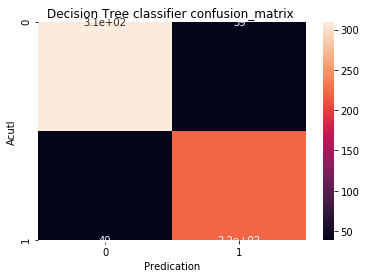

In [61]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [62]:


### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 




classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       348
           1       0.85      0.85      0.85       262

    accuracy                           0.87       610
   macro avg       0.87      0.87      0.87       610
weighted avg       0.87      0.87      0.87       610

accuracy_score= 0.8704918032786885


## تدريب النموذج علي أفضل8  سمة بعد معالجة القيم المفقودة


In [63]:

X=BC.drop(["CLASS","Sex","Age","Adress","Urea","Creatinin","TCa","GPT","GOT","ALP","PLT","K","Na","CL","HGB"],axis=1)
Y=BC["CLASS"] 


In [64]:
X.shape


(2437, 8)

In [65]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [66]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)

from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)


0.8459016393442623

In [67]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)



mean_absolute_error is = 0.1540983606557377
mean_squared_error is = 0.3925536404820846


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8459016393442623
[[302  50]
 [ 44 214]]


Text(33.0, 0.5, 'Acutl')

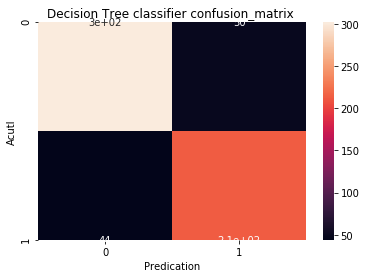

In [68]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [69]:


### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 




classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       352
           1       0.81      0.83      0.82       258

    accuracy                           0.85       610
   macro avg       0.84      0.84      0.84       610
weighted avg       0.85      0.85      0.85       610

accuracy_score= 0.8459016393442623


## تدريب النموذج علي أفضل9  سمة بعد معالجة القيم المفقودة


In [73]:

X=BC.drop(["CLASS","Sex","Age","Urea","Creatinin","TCa","GPT","GOT","ALP","PLT","K","Na","CL","HGB"],axis=1)
Y=BC["CLASS"] 


In [74]:
X.shape


(2437, 9)

In [75]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [76]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)

from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)


0.8524590163934426

In [77]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)



mean_absolute_error is = 0.14754098360655737
mean_squared_error is = 0.3841106397986879


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8524590163934426
[[286  32]
 [ 58 234]]


Text(33.0, 0.5, 'Acutl')

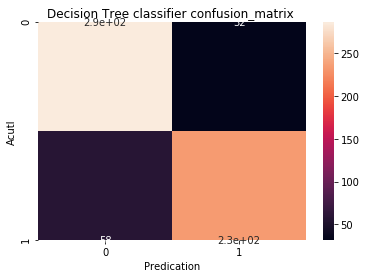

In [78]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [79]:


### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 




classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       318
           1       0.88      0.80      0.84       292

    accuracy                           0.85       610
   macro avg       0.86      0.85      0.85       610
weighted avg       0.85      0.85      0.85       610

accuracy_score= 0.8524590163934426


## تدريب النموذج علي أفضل10  سمة بعد معالجة القيم المفقودة


In [80]:

X=BC.drop(["CLASS","Sex","Age","Urea","Creatinin","TCa","GPT","GOT","ALP","PLT","K","CL","HGB"],axis=1)
Y=BC["CLASS"] 


In [81]:
X.shape


(2437, 10)

In [82]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [83]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)

from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)


0.8639344262295082

In [84]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)



mean_absolute_error is = 0.1360655737704918
mean_squared_error is = 0.36887067350291186


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8639344262295082
[[297  51]
 [ 32 230]]


Text(33.0, 0.5, 'Acutl')

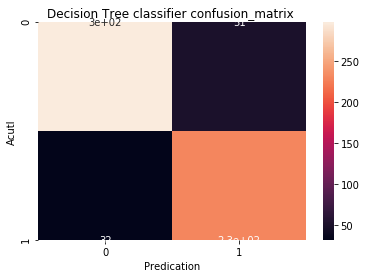

In [85]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [86]:


### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 




classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.90      0.85      0.88       348
           1       0.82      0.88      0.85       262

    accuracy                           0.86       610
   macro avg       0.86      0.87      0.86       610
weighted avg       0.87      0.86      0.86       610

accuracy_score= 0.8639344262295082


## تدريب النموذج علي أفضل11  سمة بعد معالجة القيم المفقودة


In [87]:

X=BC.drop(["CLASS","Sex","Age","Urea","Creatinin","TCa","GPT","GOT","ALP","K","CL","HGB"],axis=1)
Y=BC["CLASS"] 


In [88]:
X.shape


(2437, 11)

In [89]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [90]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)

from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)


0.8819672131147541

In [91]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)



mean_absolute_error is = 0.1180327868852459
mean_squared_error is = 0.34355900058832095


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8819672131147541
[[306  41]
 [ 31 232]]


Text(33.0, 0.5, 'Acutl')

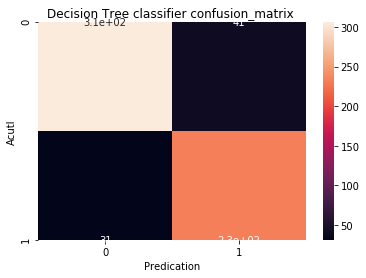

In [92]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [93]:


### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 




classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       347
           1       0.85      0.88      0.87       263

    accuracy                           0.88       610
   macro avg       0.88      0.88      0.88       610
weighted avg       0.88      0.88      0.88       610

accuracy_score= 0.8819672131147541


## تدريب النموذج علي أفضل12  سمة بعد معالجة القيم المفقودة


In [94]:

X=BC.drop(["CLASS","Sex","Age","Urea","Creatinin","TCa","GPT","GOT","ALP","CL","HGB"],axis=1)
Y=BC["CLASS"] 


In [95]:
X.shape


(2437, 12)

In [96]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [97]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)

from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)


0.8934426229508197

In [98]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)



mean_absolute_error is = 0.10655737704918032
mean_squared_error is = 0.3264312746186865


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8934426229508197
[[295  31]
 [ 34 250]]


Text(33.0, 0.5, 'Acutl')

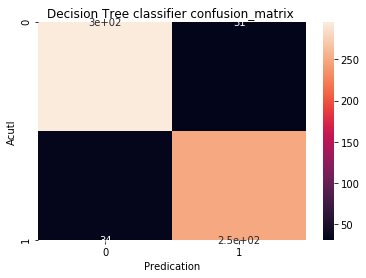

In [99]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [100]:


### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 




classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       326
           1       0.89      0.88      0.88       284

    accuracy                           0.89       610
   macro avg       0.89      0.89      0.89       610
weighted avg       0.89      0.89      0.89       610

accuracy_score= 0.8934426229508197


## تدريب النموذج علي أفضل13  سمة بعد معالجة القيم المفقودة


In [101]:

X=BC.drop(["CLASS","Sex","Age","Urea","Creatinin","TCa","GPT","GOT","CL","HGB"],axis=1)
Y=BC["CLASS"] 


In [102]:
X.shape


(2437, 13)

In [103]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [104]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)

from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)


0.9

In [105]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)



mean_absolute_error is = 0.1
mean_squared_error is = 0.31622776601683794


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.9
[[302  29]
 [ 32 247]]


Text(33.0, 0.5, 'Acutl')

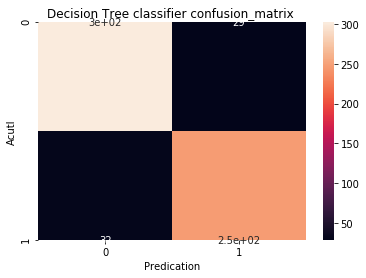

In [106]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [107]:


### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 




classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       331
           1       0.89      0.89      0.89       279

    accuracy                           0.90       610
   macro avg       0.90      0.90      0.90       610
weighted avg       0.90      0.90      0.90       610

accuracy_score= 0.9


## تدريب النموذج علي أفضل14  سمة بعد معالجة القيم المفقودة


In [108]:

X=BC.drop(["CLASS","Sex","Age","Urea","TCa","GPT","GOT","CL","HGB"],axis=1)
Y=BC["CLASS"] 


In [109]:
X.shape


(2437, 14)

In [110]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [111]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)

from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)


0.8885245901639345

In [112]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)



mean_absolute_error is = 0.11147540983606558
mean_squared_error is = 0.3338793342452713


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8885245901639345
[[311  44]
 [ 24 231]]


Text(33.0, 0.5, 'Acutl')

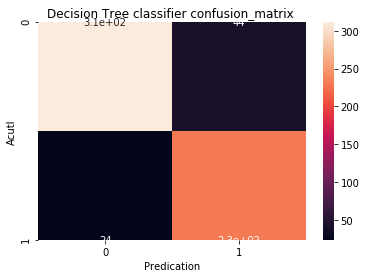

In [113]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [114]:


### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 




classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       355
           1       0.84      0.91      0.87       255

    accuracy                           0.89       610
   macro avg       0.88      0.89      0.89       610
weighted avg       0.89      0.89      0.89       610

accuracy_score= 0.8885245901639345


## تدريب النموذج علي أفضل15  سمة بعد معالجة القيم المفقودة


In [115]:

X=BC.drop(["CLASS","Sex","Age","Urea","TCa","GPT","GOT","HGB"],axis=1)
Y=BC["CLASS"] 


In [116]:
X.shape


(2437, 15)

In [117]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [118]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)

from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)


0.8622950819672132

In [119]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)



mean_absolute_error is = 0.1377049180327869
mean_squared_error is = 0.3710861329028436


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8622950819672132
[[295  50]
 [ 34 231]]


Text(33.0, 0.5, 'Acutl')

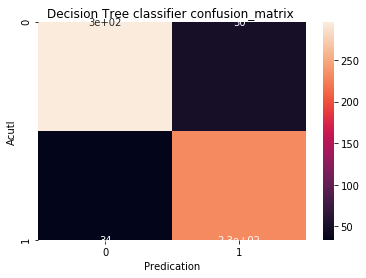

In [120]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [121]:


### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 




classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       345
           1       0.82      0.87      0.85       265

    accuracy                           0.86       610
   macro avg       0.86      0.86      0.86       610
weighted avg       0.86      0.86      0.86       610

accuracy_score= 0.8622950819672132


## تدريب النموذج علي أفضل16  سمة بعد معالجة القيم المفقودة


In [122]:

X=BC.drop(["CLASS","Age","Urea","TCa","GPT","GOT","HGB"],axis=1)
Y=BC["CLASS"] 


In [123]:
X.shape


(2437, 16)

In [124]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [125]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)

from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)


0.8950819672131147

In [126]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)



mean_absolute_error is = 0.10491803278688525
mean_squared_error is = 0.3239105320715664


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8950819672131147
[[294  32]
 [ 32 252]]


Text(33.0, 0.5, 'Acutl')

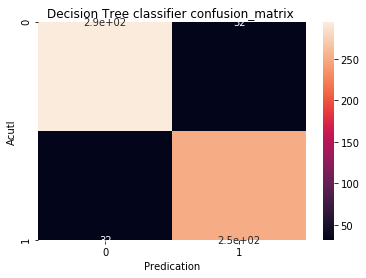

In [127]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [128]:


### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 




classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       326
           1       0.89      0.89      0.89       284

    accuracy                           0.90       610
   macro avg       0.89      0.89      0.89       610
weighted avg       0.90      0.90      0.90       610

accuracy_score= 0.8950819672131147


## تدريب النموذج علي أفضل17  سمة بعد معالجة القيم المفقودة


In [129]:

X=BC.drop(["CLASS","Age","Urea","TCa","GPT","GOT"],axis=1)
Y=BC["CLASS"] 


In [130]:
X.shape


(2437, 17)

In [131]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [132]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)

from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)


0.8950819672131147

In [133]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)



mean_absolute_error is = 0.10491803278688525
mean_squared_error is = 0.3239105320715664


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8950819672131147
[[309  37]
 [ 27 237]]


Text(33.0, 0.5, 'Acutl')

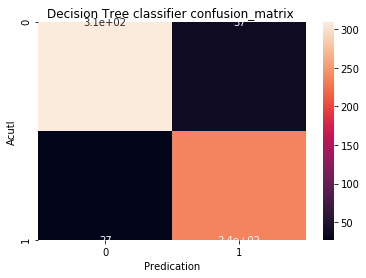

In [134]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [135]:


### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 




classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       346
           1       0.86      0.90      0.88       264

    accuracy                           0.90       610
   macro avg       0.89      0.90      0.89       610
weighted avg       0.90      0.90      0.90       610

accuracy_score= 0.8950819672131147


## تدريب النموذج علي أفضل18  سمة بعد معالجة القيم المفقودة


In [136]:

X=BC.drop(["CLASS","Urea","TCa","GPT","GOT"],axis=1)
Y=BC["CLASS"] 


In [137]:
X.shape


(2437, 18)

In [138]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [139]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)

from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)


0.8737704918032787

In [140]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)



mean_absolute_error is = 0.12622950819672132
mean_squared_error is = 0.35528792295365363


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8737704918032787
[[299  37]
 [ 40 234]]


Text(33.0, 0.5, 'Acutl')

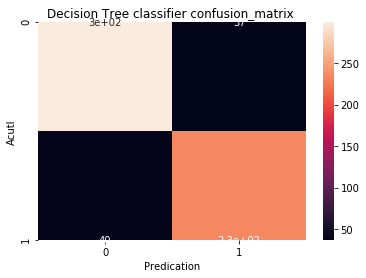

In [141]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [142]:


### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 




classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       336
           1       0.86      0.85      0.86       274

    accuracy                           0.87       610
   macro avg       0.87      0.87      0.87       610
weighted avg       0.87      0.87      0.87       610

accuracy_score= 0.8737704918032787


## تدريب النموذج علي أفضل19  سمة بعد معالجة القيم المفقودة


In [143]:

X=BC.drop(["CLASS","TCa","GPT","GOT"],axis=1)
Y=BC["CLASS"] 


In [144]:
X.shape


(2437, 19)

In [145]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [146]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)

from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)


0.8754098360655738

In [147]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)



mean_absolute_error is = 0.12459016393442623
mean_squared_error is = 0.35297331901211204


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8754098360655738
[[303  44]
 [ 32 231]]


Text(33.0, 0.5, 'Acutl')

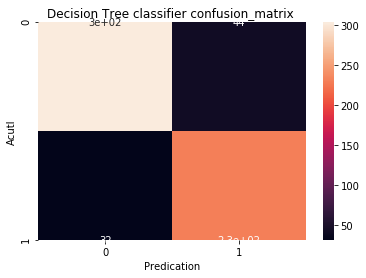

In [148]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [149]:


### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 




classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       347
           1       0.84      0.88      0.86       263

    accuracy                           0.88       610
   macro avg       0.87      0.88      0.87       610
weighted avg       0.88      0.88      0.88       610

accuracy_score= 0.8754098360655738


## تدريب النموذج علي أفضل20  سمة بعد معالجة القيم المفقودة


In [150]:

X=BC.drop(["CLASS","TCa","GOT"],axis=1)
Y=BC["CLASS"] 


In [151]:
X.shape


(2437, 20)

In [152]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [153]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)

from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)


0.8754098360655738

In [154]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)



mean_absolute_error is = 0.12459016393442623
mean_squared_error is = 0.35297331901211204


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8754098360655738
[[312  35]
 [ 41 222]]


Text(33.0, 0.5, 'Acutl')

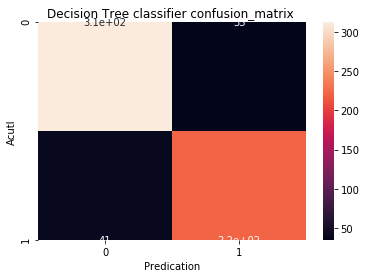

In [155]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [156]:


### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 




classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       347
           1       0.86      0.84      0.85       263

    accuracy                           0.88       610
   macro avg       0.87      0.87      0.87       610
weighted avg       0.88      0.88      0.88       610

accuracy_score= 0.8754098360655738


## تدريب النموذج علي أفضل21  سمة بعد معالجة القيم المفقودة


In [157]:

X=BC.drop(["CLASS","GOT"],axis=1)
Y=BC["CLASS"] 


In [158]:
X.shape


(2437, 21)

In [159]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [160]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)

from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)


0.8836065573770492

In [161]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)



mean_absolute_error is = 0.11639344262295082
mean_squared_error is = 0.34116483204303283


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8836065573770492
[[288  29]
 [ 42 251]]


Text(33.0, 0.5, 'Acutl')

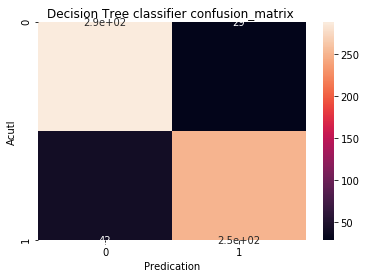

In [162]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [163]:


### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 




classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       317
           1       0.90      0.86      0.88       293

    accuracy                           0.88       610
   macro avg       0.88      0.88      0.88       610
weighted avg       0.88      0.88      0.88       610

accuracy_score= 0.8836065573770492


## تدريب النموذج علي أفضل22  سمة بعد معالجة القيم المفقودة


In [164]:

X=BC.drop(["CLASS"],axis=1)
Y=BC["CLASS"] 


In [165]:
X.shape


(2437, 22)

In [166]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [167]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)

from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)


0.8918032786885246

In [168]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)



mean_absolute_error is = 0.10819672131147541
mean_squared_error is = 0.32893270027693416


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8918032786885246
[[308  30]
 [ 36 236]]


Text(33.0, 0.5, 'Acutl')

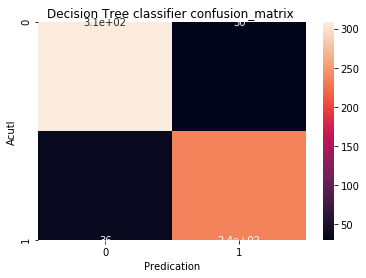

In [169]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")


In [170]:


### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 




classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       338
           1       0.89      0.87      0.88       272

    accuracy                           0.89       610
   macro avg       0.89      0.89      0.89       610
weighted avg       0.89      0.89      0.89       610

accuracy_score= 0.8918032786885246


In [171]:
No_best_Fs = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
validation_accuracy = [60,
                       72,
                       81,
                       80,
                       83,
                       87,
                       84,
                       86,
                       85,
                       88,
                       89,
                       90,
                       88,
                       86,
                       89,
                       89,
                       87,
                       87,
                       87,
                       88,
                       89]
                       
List = zip(No_best_Fs,validation_accuracy)
df = pd.DataFrame(data = List, columns=['No_best_Fs','validation_accuracy'],)
df


,No_best_Fs,validation_accuracy
0,2,60
1,3,72
2,4,81
3,5,80
4,6,83
5,7,87
6,8,84
7,9,86
8,10,85
9,11,88


C:\Users\TOSHIBA\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'bst'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


the best fretures number by  mutual information are 13:
CEA , CA15 , RBC , LDH , FBS , Adress , WBC , ESR , Adress , Na , ALB , PLT , ALP


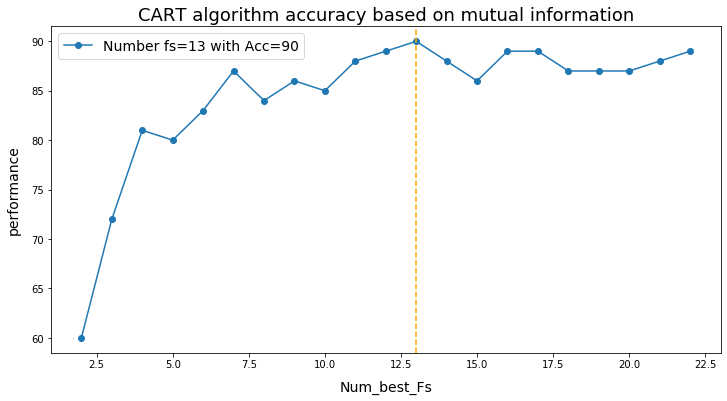

In [174]:
plt.figure(figsize=(12,6))
plt.plot(df['No_best_Fs'],df['validation_accuracy'],label='Number fs=13 with Acc=90',marker='o')

plt.title("CART algorithm accuracy based on mutual information",fontsize=18)
plt.axvline(x=13, color='orange', linestyle='--')
plt.xlabel('Num_best_Fs',labelpad=10, fontsize=14)
plt.ylabel('performance',labelpad=10, fontsize=14)
plt.legend(bbox_to_anchor=(1,1),fontsize=14)
plt.legend(loc='bst',fontsize=14)

print("the best fretures number by  mutual information are 13:")
print("CEA , CA15 , RBC , LDH , FBS , Adress , WBC , ESR , Adress , Na , ALB , PLT , ALP")
plt.show()